## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\wjr63\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [10]:
"""Code Here
設定超參數
"""
lr = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.8, 0.65]
NESTEROV = [True, False]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for nest in NESTEROV:
    for mome in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with nesterov = %s" % (nest)+ ", momentum = %s" % (mome))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=nest, momentum=mome)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-nesterov = %s" % (nest)+ ", momentum = %s" % (mome)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with nesterov = True, momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.1826 - acc: 0.2225 - val_loss: 2.0820 - val_acc: 0.2723
Epoch 2/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.0123 - acc: 0.3025 - val_loss: 1.9558 - val_acc: 0.3129
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9155 - acc: 0.3310 - val_loss: 1.8831 - val_acc: 0.3462
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8561 - acc: 0.3509 - val_loss: 1.8331 - val_acc: 0.3611
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8160 - acc: 0.3669 - val_loss: 1.7992 - val_acc: 0.3747
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7851 - acc: 0.3754 - val_loss: 1.7743 - val_acc: 0.3776
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7605 - acc: 0.3835 - val_loss: 1.7478 - val_acc

50000/50000 [==============================] - 4s 77us/step - loss: 2.0943 - acc: 0.2654 - val_loss: 2.0454 - val_acc: 0.2884
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0072 - acc: 0.2975 - val_loss: 1.9742 - val_acc: 0.3146
Epoch 4/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.9439 - acc: 0.3216 - val_loss: 1.9210 - val_acc: 0.3305
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8978 - acc: 0.3382 - val_loss: 1.8830 - val_acc: 0.3407
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8633 - acc: 0.3496 - val_loss: 1.8529 - val_acc: 0.3550
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8365 - acc: 0.3613 - val_loss: 1.8330 - val_acc: 0.3635
Epoch 8/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8148 - acc: 0.3676 - val_loss: 1.8088 - val_acc: 0.3717
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 69us/step - loss: 1.7277 - acc: 0.3912 - val_loss: 1.6980 - val_acc: 0.4051
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6731 - acc: 0.4100 - val_loss: 1.6451 - val_acc: 0.4161
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6255 - acc: 0.4272 - val_loss: 1.6135 - val_acc: 0.4284
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5905 - acc: 0.4374 - val_loss: 1.6032 - val_acc: 0.4295
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5580 - acc: 0.4520 - val_loss: 1.5586 - val_acc: 0.4512
Epoch 8/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5215 - acc: 0.4641 - val_loss: 1.5203 - val_acc: 0.4634
Epoch 9/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5044 - acc: 0.4692 - val_loss: 1.5901 - val_acc: 0.4324
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 70us/step - loss: 1.8381 - acc: 0.3603 - val_loss: 1.8199 - val_acc: 0.3668
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8019 - acc: 0.3711 - val_loss: 1.7882 - val_acc: 0.3749
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7731 - acc: 0.3827 - val_loss: 1.7649 - val_acc: 0.3818
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7486 - acc: 0.3919 - val_loss: 1.7634 - val_acc: 0.3749
Epoch 8/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7268 - acc: 0.3963 - val_loss: 1.7332 - val_acc: 0.3899
Epoch 9/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7079 - acc: 0.4039 - val_loss: 1.7044 - val_acc: 0.4091
Epoch 10/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.6896 - acc: 0.4106 - val_loss: 1.7014 - val_acc: 0.4027
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 69us/step - loss: 1.8893 - acc: 0.3396 - val_loss: 1.8714 - val_acc: 0.3475
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8595 - acc: 0.3484 - val_loss: 1.8444 - val_acc: 0.3565
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8355 - acc: 0.3583 - val_loss: 1.8240 - val_acc: 0.3596
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8151 - acc: 0.3669 - val_loss: 1.8038 - val_acc: 0.3669
Epoch 9/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7974 - acc: 0.3737 - val_loss: 1.7900 - val_acc: 0.3772
Epoch 10/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7815 - acc: 0.3794 - val_loss: 1.7714 - val_acc: 0.3849
Epoch 11/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.7665 - acc: 0.3853 - val_loss: 1.7588 - val_acc: 0.3860
Epoch 12/50
50000/50000 [=========================

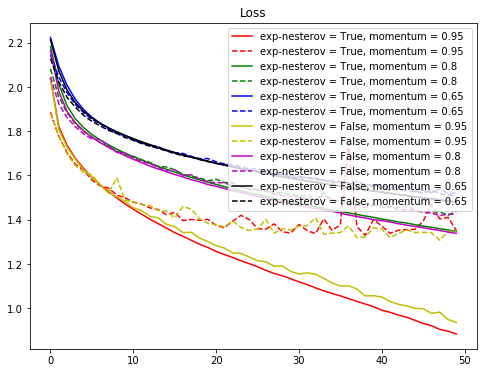

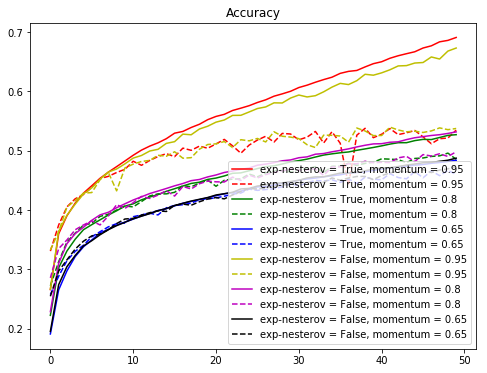

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()